## Creating Dynamic Tables Using JavaScript and HTML

`Dynamic tables` are a powerful way to present and manipulate data on a webpage. Using `JavaScript`, you can **generate**, **filter**, **sort**, **paginate**, and **populate** tables with data from various sources such as `JSON` or `REST APIs`.

## Generate Dynamic Table Using JSON

To generate a table dynamically from JSON, follow these steps

### HTML Structure

```html
    <div id="table-container">

    </div>
```

### JavaScript
```js
    const jsonData = [
        { id: 1, name: "John Doe", age: 28, occupation: "Developer" },
        { id: 2, name: "Jane Smith", age: 34, occupation: "Designer" },
        { id: 3, name: "Sam Wilson", age: 23, occupation: "Writer" },
    ];

    function generateTable(data){
        const tableContainer = document.getElementById("table-container");
        tableContainer.innerHTML = ""; // Clear any existing table

        const table = document.createElement("table");
        table.border = "1";

        // Create the table header
        const headerRow = document.createElement("tr");
        headerRow.classList.add("bg-info"); // add bootstrap class
        Object.keys(data[0]).forEach((key) => {
            console.log(key);
            const th = document.createElement("th");
            th.textContent = key.charAt(0).toUpperCase() + key.slice(1);  //Capitalize the first character
            headerRow.appendChild(th);
        });
        table.appendChild(headerRow);

        //Create table rows
        data.forEach((item)=>{
            const row = document.createElement('tr');
            Object.values(item).forEach((value)=>{
                const td = document.createElement('td');
                td.textContent = value;
                row.appendChild(td);
            });
            table.appendChild(row);
        });
        tableContainer.appendChild(table);
    };

    
    // Initialize the table
    generateTable(jsonData);
```

## Getting data from REST API

### Fetching JSON Data:

```js
// Get data from api link
fetch(`https://reqres.in/api/users`, {
    method: "GET",
    headers: {
    "X-Requested-With": "XMLHttpRequest",
    },
})
    .then((response) => response.json())
    .then((result) => {
        console.log(result.data);
    });
```

### Use `generateTable` Function 

```js
// Get data from api link
fetch(`https://reqres.in/api/users`, {
    method: "GET",
    headers: {
    "X-Requested-With": "XMLHttpRequest",
    },
})
    .then((response) => response.json())
    .then((result) => {
    //console.log(result.data);
    // Initialize the table
    generateTable(result.data);
    });
```

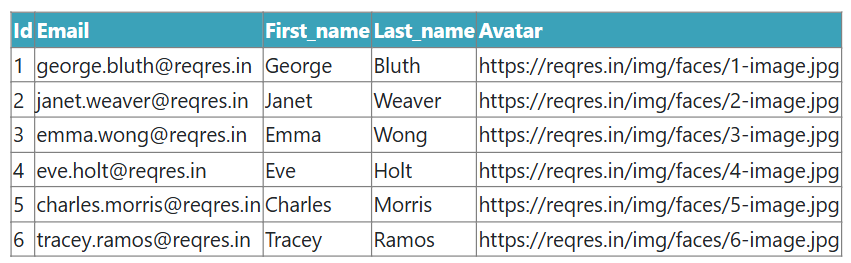

## Search by fields

### HTML Structure

```html
    <input type="text" id="search-input" placeholder="Search by name...">
    <div id="table-container"></div>
```

### JavaScript

* Add event to search input
  * We can also bind to `input` events, the difference is, `change` only triggered after input submission (user hit `enter`)

    ```js
    // Event to search input
    document.getElementById("search-input").addEventListener('change',function(e){
        console.log(`input:${e.target.value}`);
    });
    ```
  
* Filter response from api and call `generateTable` on new data
    1. declare a global variable `jsonData` to store data from api

    ```js
    // Global variable to store JSON data
    let jsonData = [];

    // Get data from api link
    fetch(`https://reqres.in/api/users`, {
        method: "GET",
        headers: {
        "X-Requested-With": "XMLHttpRequest",
        },
    })
        .then((response) => response.json())
        .then((result) => {
        //console.log(result.data);
        // Initialize the table
        jsonData = result.data
        generateTable(jsonData);
        });
    ```

    2. filter the `jsonData` and generate table base on result

    ```js
    // Event to search input
    document.getElementById("search-input").addEventListener('change',function(e){
      const query = e.target.value.toLowerCase();
      console.log(jsonData);
      const filteredData = jsonData.filter((item) =>
        `${item.first_name} ${item.last_name}`.toLowerCase().includes(query)
      );
      generateTable(filteredData);
    });
    ```

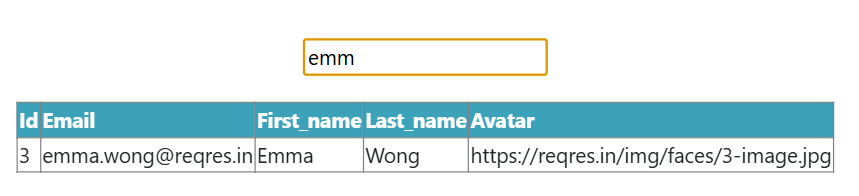

### Numeric filter

* For numeric-based filtering, you can adapt the filter function:

    ```js
    const minAge = 25;
    const maxAge = 30;
    const numericFilteredData = jsonData.filter(
    (item) => item.age >= minAge && item.age <= maxAge
    );
    generateTable(numericFilteredData);
    ```